# Load and clean data

Link for the dataset
https://www.kaggle.com/datasets/youssefaboelwafa/hotel-booking-cancellation-prediction

In [93]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [94]:
# load the data
df = pd.read_csv("booking.csv")

In [95]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [96]:
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [97]:
# check duplicates
df.duplicated().sum()

0

In [98]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [99]:
# check Nan values
df.isna().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [100]:
# drop Nan values
df = df.dropna()

In [101]:
# I still have nan values
df.isna().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [102]:
# check nan values
# we have string nan values
# that's why they were not deleted
print(df['date of reservation'].unique())

['10/2/2015' '11/6/2018' '2/28/2018' '5/20/2017' '4/11/2018' '9/13/2016'
 '10/15/2017' '12/26/2018' '7/6/2018' '10/18/2018' '9/11/2018' '4/30/2018'
 '11/26/2018' '11/20/2018' '10/20/2017' '6/15/2018' '10/5/2017'
 '8/10/2017' '10/30/2017' '10/4/2017' '11/25/2018' '3/20/2018'
 '10/13/2018' '5/22/2018' '4/28/2018' '9/21/2017' '5/19/2018' '11/6/2017'
 '9/17/2017' '9/19/2017' '11/13/2018' '12/7/2018' '1/9/2018' '10/7/2018'
 '4/27/2018' '6/19/2018' '10/17/2017' '11/19/2018' '7/30/2018' '11/1/2018'
 '6/21/2018' '4/10/2018' '6/27/2018' '11/18/2017' '12/29/2017'
 '11/20/2017' '4/6/2018' '12/29/2018' '5/30/2018' '4/22/2018' '5/16/2018'
 '11/11/2017' '6/13/2018' '7/28/2018' '4/20/2018' '9/2/2018' '5/3/2018'
 '6/24/2018' '9/10/2017' '12/18/2018' '10/5/2018' '6/3/2018' '4/15/2018'
 '4/25/2018' '8/25/2018' '11/14/2018' '8/29/2018' '10/25/2017' '3/9/2018'
 '12/31/2018' '6/28/2018' '3/29/2018' '4/1/2018' '10/11/2018' '12/25/2018'
 '3/14/2018' '3/4/2018' '10/17/2018' '9/4/2018' '12/10/2018' '8/9/2018'


In [103]:
# replace 'nan' string with actual NaN values
df['date of reservation'] = df['date of reservation'].replace('      nan', np.nan)

In [104]:
# Drop NaN values
df = df.dropna()

In [105]:
# check again all unique values
# because the model shows
# that there is nan values
print(df['date of reservation'].unique())

['10/2/2015' '11/6/2018' '2/28/2018' '5/20/2017' '4/11/2018' '9/13/2016'
 '10/15/2017' '12/26/2018' '7/6/2018' '10/18/2018' '9/11/2018' '4/30/2018'
 '11/26/2018' '11/20/2018' '10/20/2017' '6/15/2018' '10/5/2017'
 '8/10/2017' '10/30/2017' '10/4/2017' '11/25/2018' '3/20/2018'
 '10/13/2018' '5/22/2018' '4/28/2018' '9/21/2017' '5/19/2018' '11/6/2017'
 '9/17/2017' '9/19/2017' '11/13/2018' '12/7/2018' '1/9/2018' '10/7/2018'
 '4/27/2018' '6/19/2018' '10/17/2017' '11/19/2018' '7/30/2018' '11/1/2018'
 '6/21/2018' '4/10/2018' '6/27/2018' '11/18/2017' '12/29/2017'
 '11/20/2017' '4/6/2018' '12/29/2018' '5/30/2018' '4/22/2018' '5/16/2018'
 '11/11/2017' '6/13/2018' '7/28/2018' '4/20/2018' '9/2/2018' '5/3/2018'
 '6/24/2018' '9/10/2017' '12/18/2018' '10/5/2018' '6/3/2018' '4/15/2018'
 '4/25/2018' '8/25/2018' '11/14/2018' '8/29/2018' '10/25/2017' '3/9/2018'
 '12/31/2018' '6/28/2018' '3/29/2018' '4/1/2018' '10/11/2018' '12/25/2018'
 '3/14/2018' '3/4/2018' '10/17/2018' '9/4/2018' '12/10/2018' '8/9/2018'


In [106]:
# check nan values
df.isna().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [107]:
# drop ID column
df = df.drop("Booking_ID", axis=1)

In [108]:
# check unique values 
# to understand content of columns
unique_values = df['type of meal'].unique()
print(unique_values)

['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']


In [109]:
# check unique values 
# to understand content of columns
unique_values = df['room type'].unique()
print(unique_values)

['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']


In [110]:
# check unique values 
# to understand content of columns
unique_values = df['booking status'].unique()
print(unique_values)

['Not_Canceled' 'Canceled']


In [111]:
# check unique values 
# to understand content of columns
unique_values = df['market segment type'].unique()
print(unique_values)

['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']


In [112]:
# convert columns into numeric format
# this just converts the value of column to 0 or 1
from sklearn.preprocessing import LabelEncoder
variables = ['type of meal', 'room type', 'booking status', 'market segment type']
encoder = LabelEncoder()
df[variables] = df[variables].apply(encoder.fit_transform)

# Print the unique encoded values for each column
for var in variables:
    unique_encoded_values = df[var].unique()
    print(f"Encoded values for {var}: {unique_encoded_values}")

Encoded values for type of meal: [0 3 1 2]
Encoded values for room type: [0 3 1 5 4 6 2]
Encoded values for booking status: [1 0]
Encoded values for market segment type: [3 4 2 0 1]


In [113]:
df.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,1,1,2,5,0,0,0,224,3,0,0,0,88.00,0,10/2/2015,1
1,1,0,1,3,3,0,0,5,4,0,0,0,106.68,1,11/6/2018,1
2,2,1,1,3,0,0,0,1,4,0,0,0,50.00,0,2/28/2018,0
3,1,0,0,2,0,0,0,211,4,0,0,0,100.00,1,5/20/2017,0
4,1,0,1,2,3,0,0,48,4,0,0,0,77.00,0,4/11/2018,0


In [114]:
# "date of reservation" did not convert well
# by using LabelEncoder
# check format
column_type = df['date of reservation'].dtype
print(f"The data type of 'column_name' is: {column_type}")

The data type of 'column_name' is: object


In [115]:
# Method 2: Using type() function
# to check format
column_type = type(df['date of reservation'][0])
print(f"The data type of 'column_name' is: {column_type}")

The data type of 'column_name' is: <class 'str'>


In [116]:
# make string to datetime format
df['date of reservation'] = pd.to_datetime(df['date of reservation'], errors='coerce')

# make datetime to 'YYYYMMDD'
df['date of reservation'] = df['date of reservation'].dt.strftime('%Y%m%d')

# make it as an integer
df['date of reservation'] = pd.to_numeric(df['date of reservation'], errors='coerce')

In [117]:
# check types of columns
column_types = df.dtypes

# Print the data types of each column

print(column_types)

number of adults              int64
number of children            int64
number of weekend nights      int64
number of week nights         int64
type of meal                  int64
car parking space             int64
room type                     int64
lead time                     int64
market segment type           int64
repeated                      int64
P-C                           int64
P-not-C                       int64
average price               float64
special requests              int64
date of reservation         float64
booking status                int64
dtype: object


In [118]:
# I do not need to convert all columns to int
# but the code does not show me nan values

# I tried this code
# to see if I have nan values
# df[['average price', 'date of reservation']] = df[['average price', 'date of reservation']].astype('int64')
# I have this error "Cannot convert non-finite values (NA or inf) to integer"

# drop nan values again
df.dropna(subset=['average price', 'date of reservation'], inplace=True)

In [119]:
# check types of columns
column_types = df.dtypes

# Print the data types of each column
print(column_types)

number of adults              int64
number of children            int64
number of weekend nights      int64
number of week nights         int64
type of meal                  int64
car parking space             int64
room type                     int64
lead time                     int64
market segment type           int64
repeated                      int64
P-C                           int64
P-not-C                       int64
average price               float64
special requests              int64
date of reservation         float64
booking status                int64
dtype: object


#  Convert data to X/y and scale the values

In [120]:
# X/y -split
X = df.drop('booking status', axis=1)
y = df['booking status']

In [121]:
# split the data into train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=156)

# Create the KNN classifier and fit the data

Based on iterations, best k-value is this:
5


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

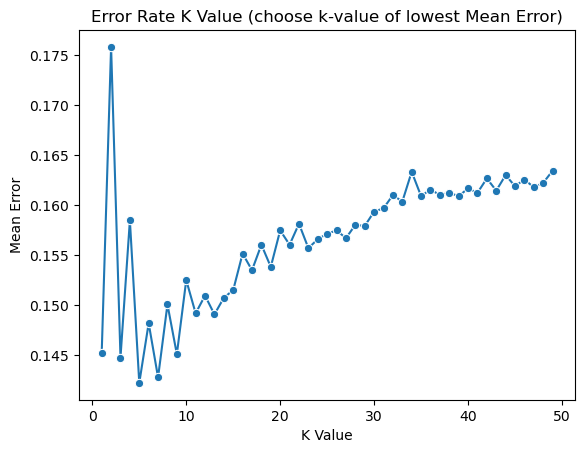

In [122]:
# determine the optimal k-value for this algorithm

# CLASSIFIER VERSION
# adjust this to 50 or even 150 if you have lots of data rows
# this has to always be less than the amount of rows
# in the training data
max_iterations = 50

# list to save the error values in the loop
error = []

# the default metric in scikit-learn
metric_selection = "minkowski"

# Calculating error for K values between 1 and 40
for i in range(1, max_iterations):

     # try with current k-value, train the model and make a test prediction
    knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=i, metric=metric_selection))
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)

    # save the error value for this k-value
    error.append(np.mean(pred_i != y_test))
    
# plot all the k-values and their error values
sns.lineplot(x=range(1, max_iterations), y=error, marker='o')
plt.title('Error Rate K Value (choose k-value of lowest Mean Error)')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# choose best k-value based on metrics
# we have to add +1 to k-value, since argmin() returns an index
# which starts from 0, but k-values start from 1
print("Based on iterations, best k-value is this:")
k_value = np.argmin(error) + 1
print(k_value)

# build the model with the optimal values
model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k_value, metric="minkowski"))
model.fit(X_train, y_train)

In [ ]:
# after epoch #10 the model starts to overfit

# Classification error metrics

In [123]:
predictions = model.predict(X_test)

In [124]:
# print the classification report based on true values and predictions
print(classification_report(y_test, predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

# metrics are good
# maybe other algorythms would work here better

              precision    recall  f1-score   support

           0       0.79      0.76      0.78      2960
           1       0.89      0.90      0.90      6102

    accuracy                           0.86      9062
   macro avg       0.84      0.83      0.84      9062
weighted avg       0.86      0.86      0.86      9062


Model overall accuracy: 85.78%


In [128]:
# save to try another algorythm
df.to_csv('data.csv', index=False)

<Axes: >

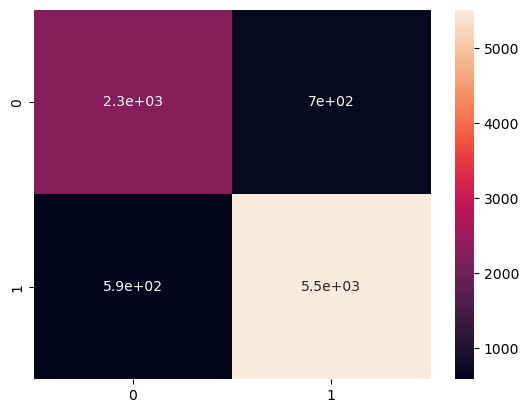

In [125]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [126]:
print(confusion_matrix(y_test, predictions))

[[2259  701]
 [ 588 5514]]


In [127]:
# basically 0.5 means you could get the same result with just random guessing
roc_auc_score(y_test.values, model.predict_proba(X_test)[:, 1])

# very good result

0.9068653277170976